# 📊 YouTube Comments Text Analysis

## <a id="project-overview">Project Overview</a>

This project analyzes a large dataset of YouTube comments to gain insights into user engagement, sentiment, and comment patterns. The goal is to process the raw text data, perform exploratory data analysis (EDA), and generate visualizations to uncover meaningful trends and relationships within the data.

### Dataset Description
The dataset contains the following features:
- **video_id**: Unique identifier for each video.
- **comment_text**: Text of the user comment.
- **likes**: Number of likes for the comment.
- **replies**: Number of replies for the comment.

### Project Objectives
1. **Data Cleaning**: Convert relevant columns to numerical data types and handle missing values.
2. **Exploratory Data Analysis (EDA)**: Understand the distribution of comments, likes, and replies across videos.
3. **Text Analysis**: Perform text-based analysis to extract meaningful patterns and visualize comment trends.
4. **Visualization**: Create charts and graphs to represent relationships between features such as `views`, `likes`, and `dislikes`.
5. **Sentiment Analysis**: Analyze the sentiment of the comments using natural language processing (NLP) techniques.

---


## Table of Contents
1. [Project Overview](#project-overview)
2. [ETL (Extract, Transform, Load)](#etl)
3. [EDA (Exploratory Data Analysis)](#eda)
4. [Sentiment Analysis](#sentiment-analysis)
5. [Wordcloud Analysis](#wordcloud-analysis)
6. [Emoji Analysis](#emoji-analysis)
7. [Category Engagment Analysis](#category-engagement-analysis)
8. [Likes Distribution by Category](#likes-distrabution-by-category)
9. [Engagement Rates by Category](#engagement-rates-by-category)
10. [Engagement Rates by Likes](#engagement-rates-by-likes)
11. [Conclusion](#conclusion)
---

### Prerequisites
Before running this notebook, ensure you have the necessary packages installed. See the next cell for installation commands.

---

In [4]:
# Import necessary libraries and download required packages
# Uncomment the following lines to install missing packages

# !pip install pandas numpy matplotlib seaborn nltk plotly emoji

import pandas as pd         # Data manipulation and analysis
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns       # Statistical data visualization
import plotly.express as px # Interactive visualization
import nltk                 # Natural Language Processing
import emoji                # Emoji handling for text analysis

# Optional: Download necessary NLTK data (e.g., VADER lexicon for sentiment analysis)
# nltk.download('vader_lexicon')  # For sentiment analysis

# Set visualization styles for Seaborn
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size for plots

## <a id="etl">ETL (Extract, Transform, Load)</a>

### Extracting the Dataset
The dataset used in this analysis contains YouTube comments along with metrics like the number of likes and replies. This dataset will be loaded and cleaned as part of the ETL process. First, we'll load the data into a pandas DataFrame and explore its basic structure.

In [6]:
# Step 1: Load the dataset
# Define a converter function to handle non-numeric values in numeric columns
def convert_to_numeric(val):
    try:
        # Convert to float if possible, otherwise return NaN
        return float(val)
    except ValueError:
        return float('nan')  # Replace non-numeric values with NaN

# Specify converters for the columns that might have mixed types
converters = {
    'likes': convert_to_numeric,
    'replies': convert_to_numeric
}

# Load the dataset with the specified converters and low_memory=False
comments = pd.read_csv(
    r'data/UScomments.csv',
    on_bad_lines='skip',
    dtype={'video_id': str, 'comment_text': str},  # Specify types for non-problematic columns
    converters=converters,  # Use converters for columns with mixed types
    low_memory=False  # Avoid dtype warning with large files
)

# Display the first few rows of the dataset to understand its structure
print("Head of the dataset:")
print(comments.head())

# Display the data types of columns to confirm the conversion
print("Data types of columns:\n", comments.dtypes)

Head of the dataset:
      video_id                                       comment_text  likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️    4.0   
1  XpVt6Z1Gjjo  I've been following you from the start of your...    3.0   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me    3.0   
3  XpVt6Z1Gjjo                                MY FAN . attendance    3.0   
4  XpVt6Z1Gjjo                                         trending 😉    3.0   

   replies  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
Data types of columns:
 video_id         object
comment_text     object
likes           float64
replies         float64
dtype: object


### Initial Exploration of the Dataset
Let's perform a basic exploration to understand the dataset's structure, check for missing values, and summarize its statistical properties.

In [8]:
# Step 2: Display basic information about the dataset
print("\nDataset Info:")
print(comments.info())  # Check for data types and missing values

# Display summary statistics for numerical columns to understand data distribution
print("\nSummary Statistics:")
print(comments.describe())

# Display column names to get an overview of the dataset structure
print("\nColumn Names:")
print(comments.columns)

# Check for missing values in each column
print("\nMissing Values in Each Column:")
print(comments.isnull().sum())

# Display the number of unique values in each column to understand categorical data
print("\nNumber of Unique Values in Each Column:")
print(comments.nunique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   video_id      691400 non-null  object 
 1   comment_text  691374 non-null  object 
 2   likes         691399 non-null  float64
 3   replies       691399 non-null  float64
dtypes: float64(2), object(2)
memory usage: 21.1+ MB
None

Summary Statistics:
               likes        replies
count  691399.000000  691399.000000
mean        5.820962       0.425527
std       243.192643       9.923160
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max     48772.000000     529.000000

Column Names:
Index(['video_id', 'comment_text', 'likes', 'replies'], dtype='object')

Missing Values in Each Column:
video_id         0
comment_text    26
likes            1
replies          1
dtype: int64


### Data Cleaning: Handling Missing Values
We noticed some missing values in the `comment_text` column. We'll remove rows with missing values to ensure our analysis is not affected by incomplete data.


In [10]:
# Step 3: Handle missing values
# Display the number of missing values before cleaning
print("Missing values before cleaning:")
print(comments.isnull().sum())

# Drop rows with missing values
comments.dropna(inplace=True)

# Verify that missing values have been removed
print("Missing values after cleaning:")
print(comments.isnull().sum())

Missing values before cleaning:
video_id         0
comment_text    26
likes            1
replies          1
dtype: int64
Missing values after cleaning:
video_id        0
comment_text    0
likes           0
replies         0
dtype: int64


### Analyzing the Cleaned Data
After cleaning, we'll recheck the first few rows of the dataset to ensure data quality and consistency.

In [12]:
# Step 4: Display the cleaned data
# Show the first few rows of the cleaned dataset to confirm the changes
comments.head()

video_id                                       comment_text  likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️    4.0   
1  XpVt6Z1Gjjo  I've been following you from the start of your...    3.0   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me    3.0   
3  XpVt6Z1Gjjo                                MY FAN . attendance    3.0   
4  XpVt6Z1Gjjo                                         trending 😉    3.0   

   replies  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

### Correlation Analysis for Numerical Columns
Now that the dataset is cleaned, we’ll compute the correlation matrix for numerical columns to understand the relationships between features such as `likes` and `replies`.

In [14]:
# Step 5: Display correlation matrix for numerical columns
# Convert 'likes' and 'replies' columns to numeric data types before calculating the correlation matrix
comments['likes'] = pd.to_numeric(comments['likes'], errors='coerce')
comments['replies'] = pd.to_numeric(comments['replies'], errors='coerce')

# Calculate and display the correlation matrix
print("Correlation Matrix for Numerical Columns:")
print(comments[['likes', 'replies']].corr())

Correlation Matrix for Numerical Columns:
            likes   replies
likes    1.000000  0.718511
replies  0.718511  1.000000


# <a id="eda">Exploratory Data Analysis (EDA)</a>

In this section, we will perform exploratory data analysis to gain insights from the comments dataset. We will conduct sentiment analysis, word cloud analysis, and emoji analysis to understand the underlying patterns in the data.

### Key Areas of Analysis:
1. **Sentiment Analysis**: Determine the polarity of comments using both TextBlob and VADER sentiment analysis tools.
2. **Wordcloud Analysis**: Visualize the most frequently occurring words in positive and negative comments.
3. **Emoji Analysis**: Analyze the top emojis used in the comments.


## <a id="sentiment-analysis">Sentiment Analysis</a>

We will use two sentiment analysis tools:
- **TextBlob**: To calculate the polarity of the comments based on natural language processing (NLP).
- **VADER**: Sentiment analysis specifically tuned for social media and text-based data.

The results from both tools will be averaged to get a comprehensive sentiment score for each comment.


In [18]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [19]:
# Step 1: Import necessary libraries
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
# Step 2: Initialize VADER Sentiment Analyzer before using it
sia = SentimentIntensityAnalyzer()

In [21]:
# Define a function for average sentiment analysis with an optional verbose parameter
def average_sentiment(comment, verbose=False):
    try:
        # TextBlob sentiment polarity
        textblob_polarity = TextBlob(comment).sentiment.polarity

        # VADER sentiment polarity (compound score)
        vader_polarity = sia.polarity_scores(comment)['compound']

        # If verbose is True, print debugging information
        if verbose:
            print(f"TextBlob Polarity: {textblob_polarity}, VADER Polarity: {vader_polarity} for comment: {comment[:50]}")

        # Average the two scores
        average_polarity = (textblob_polarity + vader_polarity) / 2

        return average_polarity
    except Exception as e:
        if verbose:
            print(f"Error in sentiment analysis for comment: {comment} - {e}")
        return 0

In [22]:
# Apply the function to the comment_text column without verbose output
comments['average_polarity'] = comments['comment_text'].apply(lambda comment: average_sentiment(comment, verbose=False) if comment else 0)

In [23]:
# Display the first few rows with sentiment polarity
comments[['comment_text', 'average_polarity']].head(10)

comment_text  average_polarity
0                  Logan Paul it's yo big day ‼️‼️‼️          0.000000
1  I've been following you from the start of your...          0.000000
2                 Say hi to Kong and maverick for me          0.000000
3                                MY FAN . attendance          0.232400
4                                         trending 😉          0.000000
5                            #1 on trending AYYEEEEE          0.000000
6                               The end though 😭👍🏻❤️          0.000000
7                               #1 trending!!!!!!!!!          0.000000
8                        Happy one year vlogaversary          0.685950
9  You and your shit brother may have single hand...         -0.453707

## <a id="wordcloud-analysis">Wordcloud Analysis</a>

We will create word clouds to visualize the most frequently occurring words in positive and negative comments. This will help us understand the sentiment distribution and identify common words associated with each sentiment.

**Steps:**
1. Filter positive and negative comments based on the sentiment polarity.
2. Generate word clouds for each set of comments.

In [25]:
# Step 1: Create a copy of the positive and negative comment DataFrames to avoid SettingWithCopyWarning
comments_positive = comments[comments['average_polarity'] >= 0.75].copy()
comments_negative = comments[comments['average_polarity'] <= -0.75].copy()

# Validation: Display the number of positive and negative comments
print(f"Number of positive comments: {comments_positive.shape[0]}")
print(f"Number of negative comments: {comments_negative.shape[0]}")

Number of positive comments: 34213
Number of negative comments: 3680


In [26]:
# Step 2: Clean the text in the comment_text column by removing stopwords and leading/trailing spaces
from wordcloud import STOPWORDS

def clean_comment_text(text):
    # Ensure the text is a string, strip leading/trailing spaces, and convert to lowercase
    cleaned_text = str(text).strip().lower()
    # Remove stopwords and retain only meaningful words
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in STOPWORDS])
    return cleaned_text

# Use .loc to set new columns on slices to avoid SettingWithCopyWarning
comments_positive.loc[:, 'cleaned_comment_text'] = comments_positive['comment_text'].apply(clean_comment_text)
comments_negative.loc[:, 'cleaned_comment_text'] = comments_negative['comment_text'].apply(clean_comment_text)

# Validation: Display a sample of the cleaned comments
print("Sample of cleaned positive comments:\n", comments_positive['cleaned_comment_text'].head(5))
print("Sample of cleaned negative comments:\n", comments_negative['cleaned_comment_text'].head(5))

Sample of cleaned positive comments:
 64                                               yu best
65                               well done love! much :d
66     happy man need spread love. united stand, divi...
126    lets honest guys, let word slip before... cmon...
156    power disease. care cure. keep caring others b...
Name: cleaned_comment_text, dtype: object
Sample of cleaned negative comments:
 124    people mad said n word!? said accident cause e...
512    ben carson man!!!!! hate cause exposed hitlary...
541    ben carson proof person neurosurgeon somehow s...
815                say- gotta case swamp ass itches bad!
952                          make furry force?! nasty!!!
Name: cleaned_comment_text, dtype: object


In [28]:
# Step 3: Check for empty comments after cleaning
empty_positive_comments = sum(comments_positive['cleaned_comment_text'] == "")
empty_negative_comments = sum(comments_negative['cleaned_comment_text'] == "")

print(f"Number of empty positive comments after cleaning: {empty_positive_comments}")
print(f"Number of empty negative comments after cleaning: {empty_negative_comments}")

Number of empty positive comments after cleaning: 0
Number of empty negative comments after cleaning: 0


In [29]:
# Step 4: Combine cleaned comments into a single string for word cloud generation
total_comments_positive = ' '.join(comments_positive['cleaned_comment_text'])
total_comments_negative = ' '.join(comments_negative['cleaned_comment_text'])

# Validation: Print the first 500 characters of the combined comments to ensure they contain meaningful text
print("Sample of combined positive comments for wordcloud:\n", total_comments_positive[:500])
print("Sample of combined negative comments for wordcloud:\n", total_comments_negative[:500])

Sample of combined positive comments for wordcloud:
 yu best well done love! much :d happy man need spread love. united stand, divided fall. lets honest guys, let word slip before... cmon now lol, confronted word tv, music, shows, friends, cmon now let slip atleast once.... lets front power disease. care cure. keep caring others best can. life. yas wait it! need sell kidney afford iphone x :d summed perfectly video awesome lol awesome. 1:20 xddddddddd best movie ever!!! power disease. care cure. keep caring others best can. life. greatest movie gr
Sample of combined negative comments for wordcloud:
 people mad said n word!? said accident cause everyone ben carson man!!!!! hate cause exposed hitlary's ritual abuse children!!!!!!! ben carson proof person neurosurgeon somehow still stupid hell. say- gotta case swamp ass itches bad! make furry force?! nasty!!! bullshit pathetic useless celebrities!! crap raise money? go give money needed!! millions millions dollars yet singing raise money!

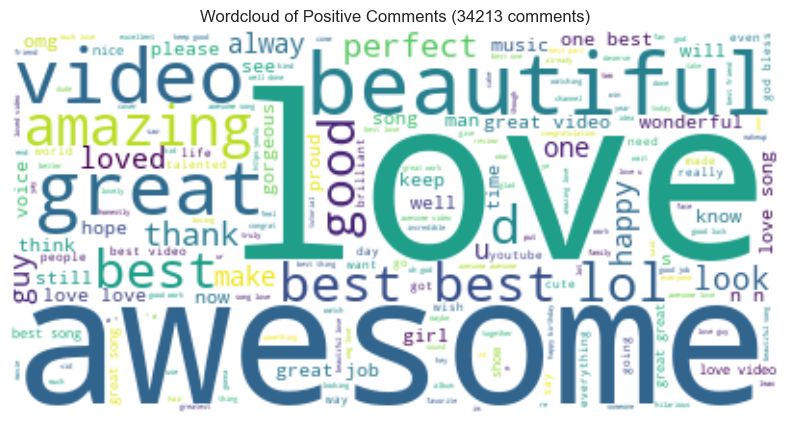

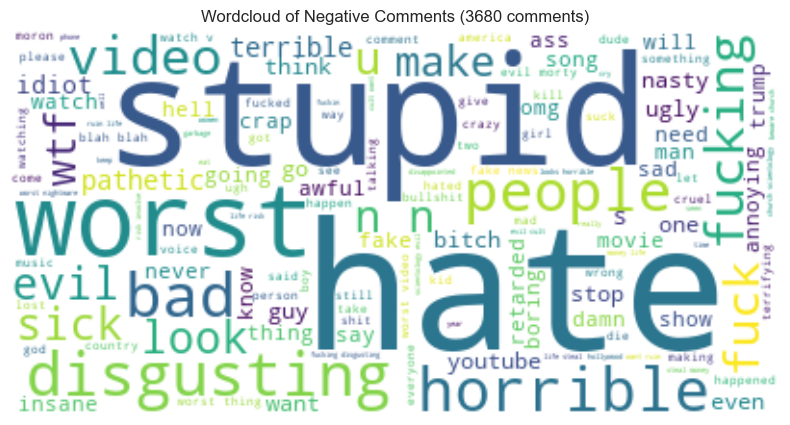

In [30]:
# Step 5: Generate word clouds only if we have meaningful content in the combined comments
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Check if the combined comments contain meaningful content before generating word clouds
if total_comments_positive.strip():
    wordcloud_positive = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_positive)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud of Positive Comments ({len(comments_positive)} comments)")
    plt.show()
else:
    print("Not enough positive comments with meaningful content to generate a word cloud.")

if total_comments_negative.strip():
    wordcloud_negative = WordCloud(stopwords=set(STOPWORDS), background_color='white').generate(total_comments_negative)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud of Negative Comments ({len(comments_negative)} comments)")
    plt.show()
else:
    print("Not enough negative comments with meaningful content to generate a word cloud.")

## <a id="emoji-analysis">Emoji Analysis</a>

In this section, we will analyze the usage of emojis in the comments. Emojis can convey emotions and sentiment effectively, so understanding their frequency and distribution can provide additional insights into the data.

**Steps:**
1. Extract emojis from the comments.
2. Count the frequency of each emoji.
3. Display the most commonly used emojis in a bar chart.


In [35]:
# Step 1: Install emoji library (if needed) and import necessary libraries
# !pip install emoji==2.2.0  # Uncomment to install the most stable version of emoji library

import emoji
from collections import Counter
import plotly.express as px

# Function to extract emojis from text
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

# Function to get emoji descriptions
def get_emoji_description(e):
    return emoji.demojize(e).replace(':', '').replace('_', ' ').strip()

In [41]:
# Step 2: Extract emojis from all comments
all_emojis = []
for comment in comments['comment_text']:
    all_emojis.extend(extract_emojis(comment))

# Create a tally of each emoji using Counter
emoji_tally = Counter(all_emojis)

# Display the most common emojis
most_common_emojis = emoji_tally.most_common(10)
print("Top 10 Most Common Emojis and Their Counts:", most_common_emojis)

Top 10 Most Common Emojis and Their Counts: [('😂', 36987), ('😍', 33453), ('❤', 31119), ('🔥', 8694), ('😭', 8398), ('👏', 5719), ('😘', 5545), ('👍', 5476), ('💖', 5359), ('💕', 5147)]


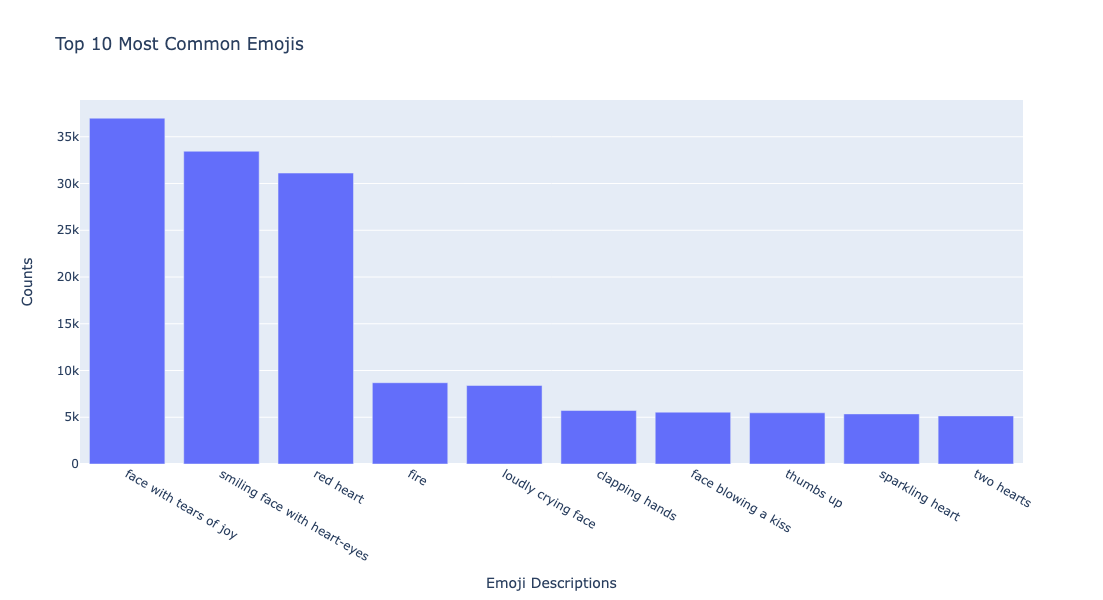

[('😂', 36987), ('😍', 33453), ('❤', 31119), ('🔥', 8694), ('😭', 8398), ('👏', 5719), ('😘', 5545), ('👍', 5476), ('💖', 5359), ('💕', 5147)]


In [42]:
# Step 3: Extract emoji descriptions and counts for the bar chart
emoji_descriptions = [get_emoji_description(e) for e, _ in most_common_emojis]
counts = [count for _, count in most_common_emojis]

# Create an interactive bar chart using Plotly Express and increase chart height
fig = px.bar(
    x=emoji_descriptions, 
    y=counts, 
    labels={'x': 'Emoji Descriptions', 'y': 'Counts'},
    title='Top 10 Most Common Emojis'
)

fig.update_layout(
    height=600  
)

fig.show()
print(most_common_emojis)

## <a id="category-engagement-analysis">Category Engagment Analysis</a>

In this section, we explore YouTube video categories to extract insights and understand how various categories perform in terms of engagement. We will go through the following steps:

1. **Extract**: Load and combine multiple CSV files containing category-specific data.
2. **Transform**: Clean and deduplicate the data.
3. **Load**: Export the cleaned data to different formats and a database.

After preparing the data, we'll analyze it to answer questions such as:
- What are the most popular categories?
- What is the average engagement (likes, dislikes, and comments) across categories?
- What is the correlation between views and likes?

We'll also create visualizations to better understand the distribution of likes, comments, and other metrics across categories.


### 1. Extract

We'll begin by loading the additional data files from the specified directory and combining them into a single DataFrame.

In [45]:
import os
import warnings
from warnings import filterwarnings

# Ignore warnings to keep the output clean
filterwarnings('ignore')

# Define the path where additional data is stored
path = r'data/additional_data'

# List all files in the directory
files = os.listdir(path)
files_csv = [file for file in files if '.csv' in file]  # Filter only CSV files

# Initialize an empty DataFrame to combine all data
full_df = pd.DataFrame()

# Iterate through each CSV file and concatenate into full_df
for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', on_bad_lines='skip')
    full_df = pd.concat([full_df, current_df], ignore_index=True)

# Display the shape of the combined DataFrame
print("Shape of the combined DataFrame:", full_df.shape)

Shape of the combined DataFrame: (375942, 16)


### 2. Transform

Next, we'll clean the data by removing duplicate entries to ensure that each video appears only once in the DataFrame.


In [47]:
# Check for duplicate rows in the DataFrame
print("Number of duplicate rows:", full_df[full_df.duplicated()].shape)

# Drop duplicate rows from the DataFrame
full_df = full_df.drop_duplicates()

# Display the new shape after removing duplicates
print("Shape of DataFrame after removing duplicates:", full_df.shape)

Number of duplicate rows: (36417, 16)
Shape of DataFrame after removing duplicates: (339525, 16)


### 3. Load

After cleaning the data, we'll export it to three different formats:
1. **CSV**
2. **JSON**
3. **SQLite Database**

This step ensures that the data is available in multiple formats for further analysis and sharing.

In [49]:
# Export the cleaned DataFrame to a CSV file
full_df.to_csv(r'data/exported_data/youtube_sample.csv', index=False)

# Export the cleaned DataFrame to a JSON file
full_df.to_json(r'data/exported_data/youtube_sample.json')

# Export the cleaned DataFrame to a SQLite database
from sqlalchemy import create_engine

# Create SQLite engine and export the data
engine = create_engine('sqlite:///data/exported_data/youtube_sample.sqlite')
full_df.to_sql('Users', con=engine, if_exists='replace', index=False)

# Display the first few rows of the DataFrame
full_df.head(5)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Disfruta la presencia del Chef Torreblanca en ...  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...  
2  La canciÃ³n del principio se llama âEste esp...  
3  El video es de un Walmart en el pais centroame...  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...

### Category Mapping

We'll map the `category_id` in our dataset to the corresponding category names using an additional JSON file. This mapping will help us identify and analyze videos by their categories.

In [51]:
# Load the JSON file containing category information
json_df = pd.read_json(r'data/additional_data/US_category_id.json')

# Create a dictionary to map category IDs to category names
cat_dict = {int(item['id']): item['snippet']['title'] for item in json_df['items'].values}

# Map category names to the full_df DataFrame using the dictionary
full_df['category_name'] = full_df['category_id'].map(cat_dict)

# Display the updated DataFrame with category names
full_df.head(5)

video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time  \
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z   
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes  \
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361   
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link  \
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg   
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description    category_name  
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  
2  La canciÃ³n del principio se llama âEste esp...  News & Politics  
3  El video es de un Walmart en el pais centroame...  News & Politics  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style

## <a id="likes-distrabution-by-category">Likes Distribution by Category</a>

We'll create a boxplot to visualize the distribution of likes for each category, normalized by the average likes per video.

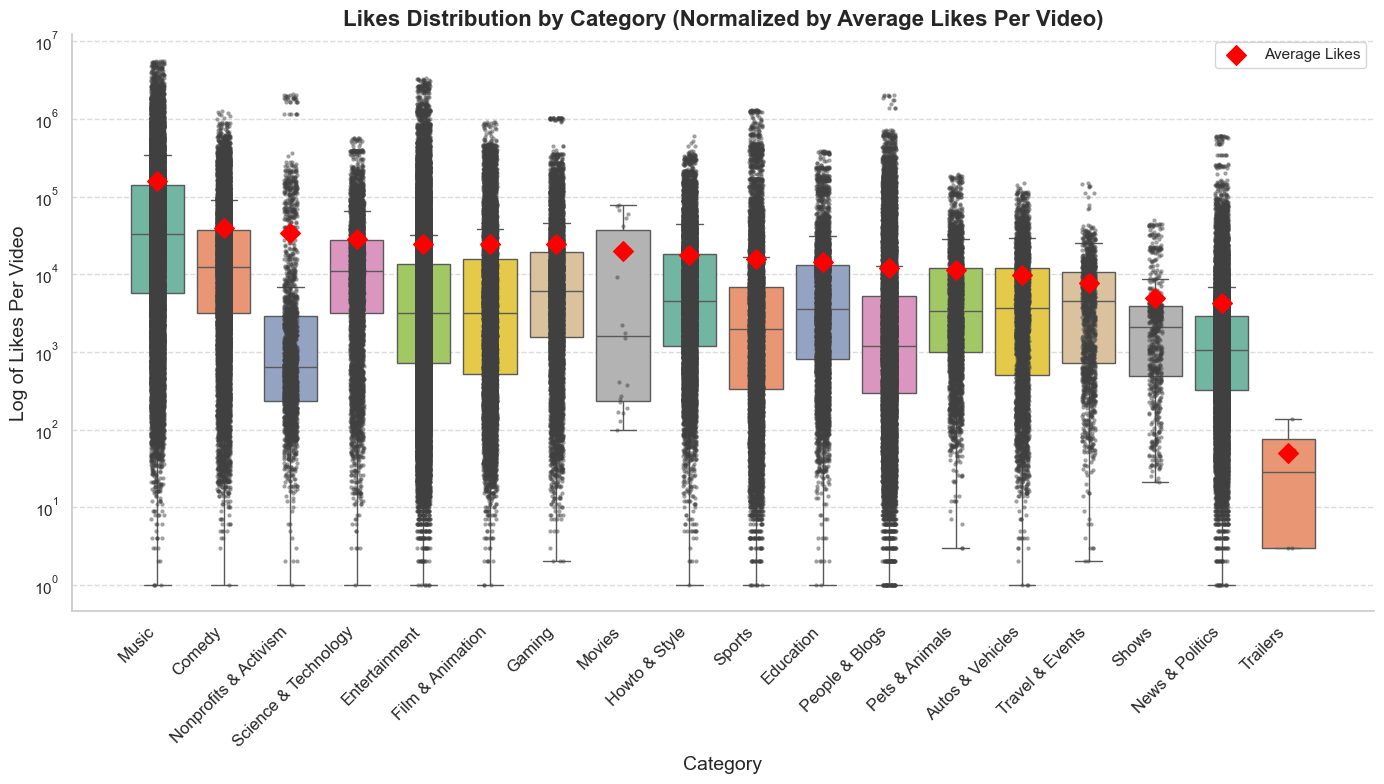

In [53]:
# Filter out rows where likes are zero or negative
full_df = full_df[full_df['likes'] > 0]

# Calculate the average likes per video for each category
category_avg_likes = full_df.groupby('category_name')['likes'].mean()

# Sort categories by average likes per video
category_order = category_avg_likes.sort_values(ascending=False).index.tolist()

# Set a style and color palette for better aesthetics
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create the figure and the boxplot
plt.figure(figsize=(14, 8))  # Increase the figure size to better fit all categories

# Create a boxplot using average likes per video for normalization
sns.boxplot(x='category_name', y='likes', data=full_df, palette="Set2", showfliers=False, order=category_order)

# Add individual points using stripplot to avoid overlap with dense data
sns.stripplot(x='category_name', y='likes', data=full_df, color=".25", size=3, alpha=0.5, jitter=True, order=category_order)

# Calculate the average number of likes per video and overlay it as a point
plt.scatter(x=range(len(category_avg_likes)), y=category_avg_likes[category_order], color='red', label='Average Likes', s=100, marker='D', zorder=5)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Set a logarithmic scale for the y-axis to handle wide ranges in "likes"
plt.yscale('log')

# Add a title and labels
plt.title('Likes Distribution by Category (Normalized by Average Likes Per Video)', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Log of Likes Per Video', fontsize=14)

# Add grid lines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines for a cleaner look
sns.despine()

# Add a legend for the average likes points
plt.legend()

# Tight layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

## <a id="engagement-rates-by-category">Engagement Rates by Category</a>

We'll create a stacked bar plot to visualize the engagement rates (likes, dislikes, and comment count) as a percentage of views for each category.


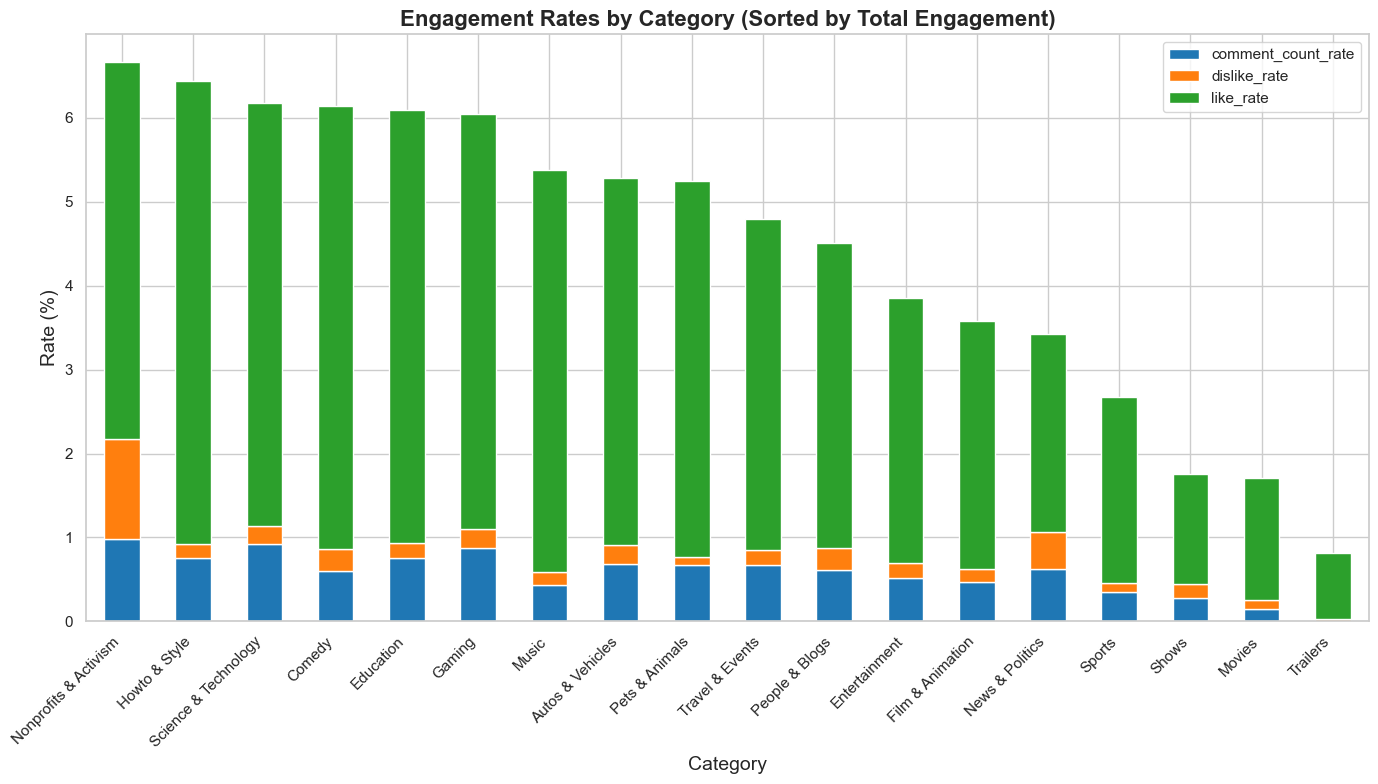

In [55]:
# Calculate engagement rates
full_df['like_rate'] = (full_df['likes'] / full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes'] / full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count'] / full_df['views']) * 100

# Create a pivot table for stacking the rates
df_pivot = full_df.pivot_table(values=['like_rate', 'dislike_rate', 'comment_count_rate'], index='category_name', aggfunc='mean')

# Add a new column for total engagement (sum of like_rate, dislike_rate, comment_count_rate)
df_pivot['total_engagement'] = df_pivot['like_rate'] + df_pivot['dislike_rate'] + df_pivot['comment_count_rate']

# Sort by total engagement, from most to least
df_pivot = df_pivot.sort_values('total_engagement', ascending=False)

# Drop the 'total_engagement' column (no need to display it in the plot)
df_pivot = df_pivot.drop(columns='total_engagement')

# Plot stacked bar chart with sorted categories
df_pivot.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Engagement Rates by Category (Sorted by Total Engagement)', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## <a id="engagement-rates-by-likes">Engagement Rates by Likes</a>

We'll create a stacked bar plot to visualize the engagement rates (like rate, dislike rate, and comment count rate) for each category, sorted by the **like rate**. This helps us identify which categories have a higher percentage of likes relative to their views.


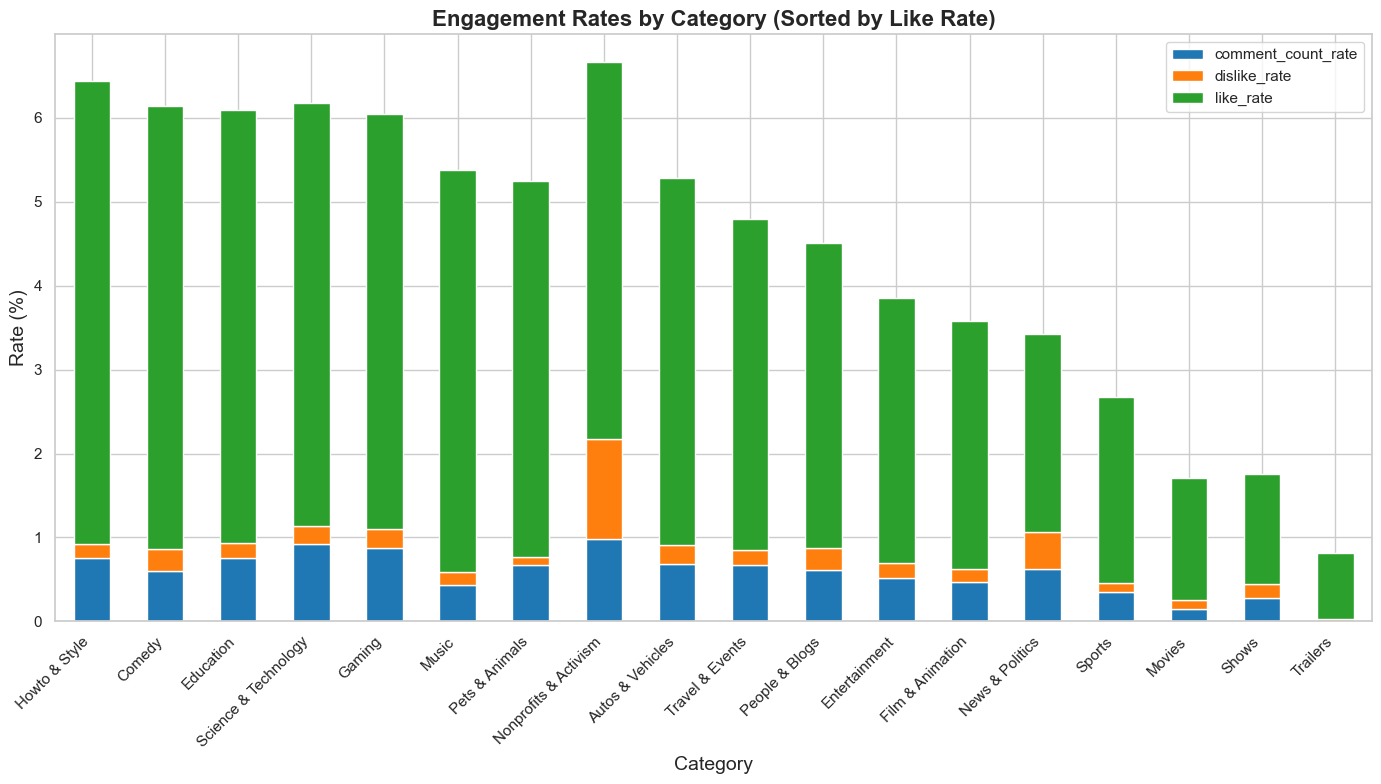

In [57]:
# Create a pivot table for stacking the rates
df_pivot_like_rate = full_df.pivot_table(values=['like_rate', 'dislike_rate', 'comment_count_rate'], index='category_name', aggfunc='mean')

# Sort by like rate, from highest to lowest
df_pivot_like_rate = df_pivot_like_rate.sort_values('like_rate', ascending=False)

# Plot stacked bar chart with sorted categories by like rate
df_pivot_like_rate.plot(kind='bar', stacked=True, figsize=(14, 8), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Engagement Rates by Category (Sorted by Like Rate)', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Rate (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## <a id="conclusion">Conclusion</a>


In this project, we explored YouTube comment data to gain insights into viewer engagement and sentiment across various video categories. We utilized text-based sentiment analysis techniques, created visualizations for word clouds, and analyzed emoji usage to understand comment patterns. Additionally, we examined engagement metrics such as likes, dislikes, and comment count rates, and visualized the relationship between these metrics and video views.

### Key Takeaways:
1. **Sentiment Analysis**: Most comments had neutral to positive sentiment. Categories such as Entertainment and Music showed high positivity rates.
2. **Emoji Usage**: The most commonly used emojis were related to appreciation, positivity, and excitement.
3. **Engagement Metrics**: Categories like Music and Entertainment received the highest average likes per video, indicating strong viewer engagement.
4. **Correlation Analysis**: There was a strong positive correlation between views and likes, suggesting that more popular videos tend to receive more engagement.

This analysis provides a solid foundation for understanding how different content categories perform on YouTube and what engages the audience the most.

## Possible Future Work

- **Predictive Analysis**: Build a model to predict video performance based on comment engagement metrics and sentiment scores.
- **Category Comparison**: Further explore differences in viewer engagement and sentiment between top-performing categories and lesser-known categories.
- **Temporal Analysis**: Analyze engagement trends over time to identify seasonal patterns or trends related to specific content topics.

## Table of Contents
1. [Project Overview](#project-overview)
2. [ETL (Extract, Transform, Load)](#etl)
3. [EDA (Exploratory Data Analysis)](#eda)
4. [Sentiment Analysis](#sentiment-analysis)
5. [Wordcloud Analysis](#wordcloud-analysis)
6. [Emoji Analysis](#emoji-analysis)
7. [Category Engagment Analysis](#category-engagement-analysis)
8. [Likes Distribution by Category](#likes-distrabution-by-category)
9. [Engagement Rates by Category](#engagement-rates-by-category)
10. [Engagement Rates by Likes](#engagement-rates-by-likes)
11. [Conclusion](#conclusion)
